In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('phone_user_review_file_1.csv', encoding='latin-1')

In [3]:
df1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [4]:
df1.shape

(374910, 11)

In [5]:
df1.size

4124010

In [6]:
df2 = pd.read_csv('phone_user_review_file_2.csv',encoding = 'latin-1')

In [7]:
df2.head() 

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [8]:
df2.shape

(114925, 11)

In [9]:
df2.size

1264175

In [10]:
df3 = pd.read_csv('phone_user_review_file_3.csv',encoding = 'latin-1')

In [11]:
df3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [12]:
df3.shape

(312961, 11)

In [13]:
df3.size

3442571

In [14]:
df4 = pd.read_csv('phone_user_review_file_4.csv',encoding = 'latin-1')

In [15]:
df4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [16]:
df4.shape

(98284, 11)

In [17]:
df4.size

1081124

In [18]:
df5 = pd.read_csv('phone_user_review_file_5.csv',encoding = 'latin-1')

In [19]:
df5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [20]:
df5.shape

(350216, 11)

In [21]:
df5.size

3852376

In [22]:
df6 = pd.read_csv('phone_user_review_file_6.csv',encoding = 'latin-1')

In [23]:
df6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [24]:
df6.shape

(163837, 11)

In [25]:
df6.size

1802207

In [26]:
df1.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/
date,5/2/2017,4/28/2017,5/4/2017,5/2/2017,5/11/2017
lang,en,en,en,en,en
country,us,us,us,us,us
source,Verizon Wireless,Phone Arena,Amazon,Samsung,Verizon Wireless
domain,verizonwireless.com,phonearena.com,amazon.com,samsung.com,verizonwireless.com
score,10.0,10.0,6.0,9.2,4.0
score_max,10.0,10.0,10.0,10.0,10.0
extract,As a diehard Samsung fan who has had every Sam...,Love the phone. the phone is sleek and smooth ...,Adequate feel. Nice heft. Processor's still sl...,Never disappointed. One of the reasons I've be...,I've now found that i'm in a group of people t...
author,CarolAnn35,james0923,R. Craig,Buster2020,S Ate Mine


In [27]:
df2.head().T

,0,1,2,3,4
phone_url,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/
date,4/15/2015,5/23/2015,4/27/2015,4/22/2015,4/18/2015
lang,en,en,en,en,en
country,us,gb,gb,gb,gb
source,Amazon,Amazon,Amazon,Amazon,Amazon
domain,amazon.com,amazon.co.uk,amazon.co.uk,amazon.co.uk,amazon.co.uk
score,2.0,10.0,8.0,10.0,10.0
score_max,10.0,10.0,10.0,10.0,10.0
extract,"The telephone headset is of poor quality , not...",This is my first smartphone so I have nothing ...,Great phone. Battery life not great but seems ...,Best 90 quid I've ever spent on a smart phone,I m happy with this phone.it s very good.thx team
author,luis,Mark Lavin,tracey,Reuben Ingram,viorel


In [28]:
df3.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/
date,11/7/2015,10/2/2015,9/2/2015,9/2/2015,9/1/2015
lang,pt,pt,pt,pt,pt
country,br,br,br,br,br
source,Submarino,Submarino,Submarino,Submarino,Colombo
domain,submarino.com.br,submarino.com.br,submarino.com.br,submarino.com.br,colombo.com.br
score,6.0,10.0,10.0,8.0,8.0
score_max,10.0,10.0,10.0,10.0,10.0
extract,"recomendo, eu comprei um, a um ano, e agora co...",Comprei um pouco desconfiada do site e do celu...,"Muito bom o produto, obvio que tem versÃµes me...",Unica ressalva fica para a camera que poderia ...,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...
author,herlington tesch,Luisa Silva Marieta,Cyrus,Marcela Santa Clara Brito,Claudine Maria Kuhn Walendorff


In [29]:
df4.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/
date,3/11/2015,17/11/2015,29/10/2015,29/10/2015,29/10/2015
lang,en,en,en,en,en
country,us,in,in,in,in
source,Amazon,Zopper,Amazon,Amazon,Amazon
domain,amazon.com,zopper.com,amazon.in,amazon.in,amazon.in
score,2.0,10.0,4.0,6.0,10.0
score_max,10.0,10.0,10.0,10.0,10.0
extract,was not conpatable with my phone as stated. I ...,Decent Functions and Easy to Operate Pros:- Th...,Not Good Phone such price. Hang too much and v...,not bad for features,Excellent product
author,Frances DeSimone,Expert Review,Amazon Customer,Amazon Customer,NHK


In [30]:
df5.head().T

,0,1,2,3,4
phone_url,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/
date,7/13/2016,7/13/2016,7/13/2016,4/25/2014,4/23/2013
lang,en,en,en,en,en
country,in,in,in,in,in
source,91 Mobiles,91 Mobiles,91 Mobiles,Naaptol,Naaptol
domain,91mobiles.com,91mobiles.com,91mobiles.com,naaptol.com,naaptol.com
score,2.0,6.0,4.0,10.0,10.0
score_max,10.0,10.0,10.0,10.0,10.0
extract,I bought 1 month before. currently speaker is ...,"I just bought one week back, I have Airtel con...",one problem in this handset opera is not worki...,here Karbonn comes up with an another excellen...,"What a phone, all so on Naaptol my god 23% off..."
author,venkatesh,Venkat,krrish,BRIJESH CHAUHAN,Suraj CHAUHAN


In [31]:
df6.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/
date,9/16/2011,2/13/2014,12/30/2011,10/18/2008,9/6/2008
lang,en,en,en,en,en
country,us,us,us,us,us
source,Phone Arena,Amazon,Phone Scoop,HandCellPhone,Reviewed.com
domain,phonearena.com,amazon.com,phonescoop.com,handcellphone.com,reviewed.com
score,8.0,6.0,9.0,4.0,6.0
score_max,10.0,10.0,10.0,10.0,10.0
extract,I've had the phone for awhile and it's a prett...,to be clear it is not the sellers fault that t...,Well i love this phone. i have had ton of phon...,I have had my Instinct for several months now ...,i have had this instinct phone for about two m...
author,ajabrams95,Stephanie,snickers,A4C,betaBgood


In [32]:
phone_s = pd.concat([df1,df2,df3,df4,df5,df5],axis=0)

In [33]:
phone = phone_s.copy()

In [34]:
phone.shape

(1601512, 11)

In [35]:
phone.size

17616632

In [36]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601512 entries, 0 to 350215
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1601512 non-null  object 
 1   date       1601512 non-null  object 
 2   lang       1601512 non-null  object 
 3   country    1601512 non-null  object 
 4   source     1601512 non-null  object 
 5   domain     1601512 non-null  object 
 6   score      1521462 non-null  float64
 7   score_max  1521462 non-null  float64
 8   extract    1576659 non-null  object 
 9   author     1522502 non-null  object 
 10  product    1601511 non-null  object 
dtypes: float64(2), object(9)
memory usage: 146.6+ MB


In [37]:
print ("Rows     : " ,phone.shape[0])
print ("Columns  : " ,phone.shape[1])
print ("\nFeatures : \n" ,phone.columns.tolist())
print ("\nMissing values :  ", phone.isnull().sum().values.sum())
print ("\nUnique values :  \n",phone.nunique())

Rows     :  1601512
Columns  :  11

Features : 
 ['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score', 'score_max', 'extract', 'author', 'product']

Missing values :   263964

Unique values :  
 phone_url       3198
date            5762
lang              21
country           41
source           318
domain           370
score             83
score_max          1
extract      1166393
author        705368
product        52239
dtype: int64


In [38]:
data_nullcols = phone.isnull().sum()
data_nullcols

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        80050
score_max    80050
extract      24853
author       79010
product          1
dtype: int64

In [39]:
phone = phone.dropna()

In [40]:
phone.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

In [41]:
phone.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
score,1427167.0,7.992062,2.635811,0.2,7.0,9.2,10.0,10.0
score_max,1427167.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0


In [42]:
phone.groupby('score')['score_max'].mean().head()  

score
0.2    10.0
0.4    10.0
1.0    10.0
1.2    10.0
1.3    10.0
Name: score_max, dtype: float64

In [43]:
phone.groupby('score')['score_max'].mean().sort_values(ascending=False).head()

score
0.2    10.0
8.0    10.0
7.8    10.0
7.7    10.0
7.6    10.0
Name: score_max, dtype: float64

In [44]:
phone.groupby('score')['score_max'].count().sort_values(ascending=False).head()

score
10.0    695070
8.0     312877
2.0     141719
6.0     123161
4.0      77108
Name: score_max, dtype: int64

In [45]:
ratings_mean_count = pd.DataFrame(phone.groupby('score')['score_max'].mean()) 

In [46]:
ratings_mean_count['rating_counts'] = pd.DataFrame(phone.groupby('score')['score_max'].count())  

In [47]:
ratings_mean_count.head()  

,score_max,rating_counts
score,,
0.2,10.0,32
0.4,10.0,4
1.0,10.0,2422
1.2,10.0,7
1.3,10.0,42


In [48]:
phone_s = phone.sample(frac=100000/len(phone), replace=None, random_state=612)
phone_s.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
267025,/cellphones/cubot-gt72/,8/21/2015,es,es,Amazon,amazon.es,2.0,10.0,"En si el telefono esta bien , pero lo que fall...",david,Cubot GT72+ Telefono Movil 3G Libre Smartphone...
26102,/cellphones/samsung-galaxy-appeal/,8/25/2013,en,us,Amazon,amazon.com,10.0,10.0,I was fed up with Sprint's coverage (through V...,Student & Professional 15,Samsung Galaxy Express GoPhone (AT&T)
76824,/cellphones/oneplus-3/,6/21/2016,en,in,Amazon,amazon.in,10.0,10.0,Thanks for the fine delivery. It's a wonderful...,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)"
220026,/cellphones/asus-zenfone-3-deluxe/,10/3/2016,en,us,Amazon,amazon.com,10.0,10.0,"I've been using it for 1 month, it is amazing ...",Squallan,Asus ZenFone 3 Deluxe 5.7-inch AMOLED FHD disp...
231520,/cellphones/nokia-2720-fold/,7/18/2010,en,gb,Amazon,amazon.co.uk,2.0,10.0,Screen did not light properly.,L,Nokia 2720 fold SIM Free - Deep Red


In [49]:
phone_s.shape

(100000, 11)

In [50]:
# Drop irrelevant features. Keep features like Author, Product, and Score. 
# we can drop phone_url,date,lang,country,source,domain and extract since they do not contribute in deciding popularity.  
phone.drop(['phone_url','date','lang','country','source','domain','score_max','extract'], axis = 1, inplace = True)

In [51]:
#Identify the most rated features.
#sorting on products that got highest mean score
phone.groupby('product')['score'].mean().sort_values(ascending=False).head()

product
Nokia 106 - nero - Cellulare                                                                               10.0
Microsoft Mobile Nokia Lumia 620 - Smartphone (sistema operativo Windows, Bluetooth, Wi-Fi) (importado)    10.0
Microsoft Lumia 535 - Green                                                                                10.0
Microsoft Lumia 535 - Grey                                                                                 10.0
Microsoft Lumia 535 - White                                                                                10.0
Name: score, dtype: float64

In [52]:
#Identify the users with most number of reviews. 
(phone['author'].value_counts()).head()

Amazon Customer    80035
Cliente Amazon     19373
e-bit               9391
Client d'Amazon     7743
Amazon Kunde        4917
Name: author, dtype: int64

In [53]:
# The product that got most number of reviews.
phone['product'].value_counts().head()

Lenovo Vibe K4 Note (White,16GB)     5226
Lenovo Vibe K4 Note (Black, 16GB)    4390
OnePlus 3 (Graphite, 64 GB)          4103
OnePlus 3 (Soft Gold, 64 GB)         3562
Nokia 5800 XpressMusic               3106
Name: product, dtype: int64

In [54]:
# extracting authors who gave greater than 50 ratings
df1 = pd.DataFrame(columns=['author', 'a_count'])
df1['author']=phone['author'].value_counts().index.tolist() 
df1['a_count'] = list(phone['author'].value_counts() > 50)

In [55]:
# get names of indexes for which count column value is False
index_names = df1[ df1['a_count'] == False ].index 
# drop these row indexes from dataFrame 
df1.drop(index_names, inplace = True) 
df1


,author,a_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
...,...,...
960,Marian,True
961,L,True
962,VÃ­ctor,True
963,Damiano,True


In [56]:
# extracting product that got more than 50 ratings

df2 = pd.DataFrame(columns=['product', 'p_count'])
df2['product']=phone['product'].value_counts().index.tolist() 
df2['p_count'] = list(phone['product'].value_counts() > 50)


In [57]:
# get names of indexes for which count column value is False

index_names = df2[ df2['p_count'] == False ].index 

# drop these row indexes from dataFrame 

df2.drop(index_names, inplace = True)


In [58]:
df2

,product,p_count
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Nokia 5800 XpressMusic,True
...,...,...
6605,"ECONOMICO 16G 13MP 5.5"" QUAD CORE CELLULARE SM...",True
6606,Samsung Galaxy S7 edge - Smartphone libre Andr...,True
6607,Huawei P8 Lite,True
6608,Samsung Galaxy S Captivate | Black,True


In [59]:
# selecting data rows where product is having more than 50 ratings.

df3 = phone[phone['product'].isin(df2['product'])] 
df3


,score,author,product
0,10.0,CarolAnn35,Samsung Galaxy S8
1,10.0,james0923,Samsung Galaxy S8
4,4.0,S Ate Mine,Samsung Galaxy S8
5,10.0,BDB76,Samsung Galaxy S8
6,4.0,KLC30306,Samsung Galaxy S8
...,...,...,...
350191,10.0,moniacale,Sony Ericsson Z710i
350193,4.0,Volante,Sony Ericsson Z710i
350194,8.0,kradlegno,Sony Ericsson Z710i
350203,8.0,Torsten,Sony Ericsson Z710i


In [60]:
# selecting data rows from df3 where author has given more than 50 ratings.
# so that we get the data with products having more than 50 ratings and users who have given more than 50 ratings

df4 = df3[df3['author'].isin(df1['author'])]
df4

,score,author,product
253,9.6,Ralf,Samsung Galaxy S8 Zwart
259,10.0,schreef,Samsung Galaxy S8
271,10.0,ÐÐ³Ð¾Ñ,Samsung Galaxy S8
272,10.0,ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ,Samsung Galaxy S8
273,10.0,ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ,Samsung Galaxy S8
...,...,...,...
349945,10.0,Ralf,LG Electronics KF750 Secret UMTS Handy (5 MP K...
349971,10.0,Paul,LG Electronics KF750 Secret UMTS Handy (5 MP K...
349990,6.0,Tobias,LG Electronics KF750 Secret UMTS Handy (5 MP K...
350002,8.0,Daniel,LG Electronics KF750 Secret UMTS Handy (5 MP K...


In [61]:
df4.shape

(189756, 3)

# Collaborative filtering using KNN


In [62]:
# arranging columns in the order of user id,item id and rating to be fed 
columns_titles = ['author','product','score']
vs_phone = phone.reindex(columns=columns_titles)

In [63]:
# Keep only 5000 data samples. Use random state=612
vs_data = vs_phone.sample(n=5000, random_state=612)

In [64]:
# Read dataset.
reader = Reader(rating_scale=(1, 10))
data_I = Dataset.load_from_df(vs_data,reader = reader)

In [65]:
trainset_I, testset_I = train_test_split(data_I, test_size=.15)

In [66]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset_I)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [67]:
# run the  model against the testset
test_pred_I = algo.test(testset_I)

In [68]:
test_pred_I

[Prediction(uid='kishor gera', iid='Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)', r_ui=2.0, est=7.956258823529413, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='pergusal', iid='Samsung Galaxy S5 Mini Smartphone dÃ©bloquÃ© 4G (Ecran: 4.5 pouces - 16 Go - Android Kitkat 4.4) Noir', r_ui=10.0, est=7.956258823529413, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Daniel Polke', iid='HTC Wildfire S Smartphone (8.1 cm (3.2 Zoll) Touchscreen, WiFi (b/g/n), Android OS 2.3.3) schwarz', r_ui=4.0, est=7.956258823529413, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='franck77290', iid='Samsung GT E2210', r_ui=10.0, est=7.956258823529413, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Ð\xadÐ»Ð¸Ð½Ð° Ð§Ð¾Ð¿Ñ\x83Ñ\x80Ñ\x8fÐ½', iid='Nokia 5130 XpressMusic', r_ui=6.0, est=7.956258823529413, details={'was_impossible': Tru

In [69]:
#Get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_I, verbose=True)

Item-based Model : Test Set
RMSE: 2.8401


2.8401486909790843

# KNN - User based model

In [70]:
reader = Reader(rating_scale=(1, 10))
data_U = Dataset.load_from_df(vs_data,reader = reader)

In [71]:
trainset_U, testset_U = train_test_split(data_U, test_size=.15)

In [72]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset_U)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [73]:
# query for specific predicions
uid = 'Frances DeSimone'  # raw user id
iid = 'Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce.'  # raw item id

In [74]:
#Get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: Frances DeSimone item: Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce. r_ui = None   est = 7.98   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


In [75]:
# run the trained model against the testset
test_pred_U = algo.test(testset_U)

In [76]:
#Predict score (average rating) for test users
test_pred_U

[Prediction(uid='IG', iid='Apple iPhone 4 A1332 16GB White (GSM Unlocked)', r_ui=10.0, est=7.976541176470589, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='xlaky', iid='Fly E145', r_ui=10.0, est=7.976541176470589, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='?????????????????? ?\x80????????', iid='Nokia 301 Dual Sim', r_ui=2.0, est=7.976541176470589, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='â\x99«â\x99« Trouble â\x99«â\x99«', iid='Apple iPhone 7 Plus 4G LTE Unlocked GSM Quad Core Smartphone w/ 12MP Camera (US Version) Jet Black', r_ui=8.0, est=7.976541176470589, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='DGM', iid='BLU VIVO 5R Refresh Smartphone - 5.5-Inch Display 4G LTE GSM Unlocked, GOLD', r_ui=6.0, est=7.976541176470589, details={'was_impossible': True, 'reason': 'User and/or item is unkow

In [77]:
# Evaluate the collaborative model. Print RMSE value for User Based CF
print("User-based Model : Test Set")
accuracy.rmse(test_pred_U, verbose=True)

User-based Model : Test Set
RMSE: 2.7736


2.773599052213994

In [78]:
d_df = phone
phone.shape

(1427167, 3)

In [79]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [80]:
phone.head(2)

,score,author,product
0,10.0,CarolAnn35,Samsung Galaxy S8
1,10.0,james0923,Samsung Galaxy S8


In [81]:
data = Dataset.load_from_df(phone[['product', 'author', 'score']], reader)

In [82]:
data.df.head(2)

,product,author,score
0,Samsung Galaxy S8,CarolAnn35,10.0
1,Samsung Galaxy S8,james0923,10.0


# SVD Based Recommendation System

In [83]:
from surprise import Dataset,Reader

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(phone[['product', 'author', 'score']], reader)

In [84]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

# to build on full data
#trainset = data.build_full_trainset()

In [85]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x00000168BE71E5F0>

In [86]:
# However the ids are the inner ids and not the raw ids
# raw ids can be obatined as follows

print(trainset.to_raw_uid(0))
#print(trainset.to_raw_iid(1066))

LG G4 H815 wit / 32 GB - Overzicht


In [87]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [88]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [89]:
testset[0]

("BUON REGALO ECONOMICO 5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582...",
 'shirley',
 2.0)

In [90]:
test_pred = svd_model.test(testset)

In [91]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 2.8538


2.8537791829893244

# item- item collabrating

In [92]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [93]:
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.15)

In [94]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [95]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [96]:
test_pred

[Prediction(uid='279', iid='173', r_ui=5.0, est=3.976270427243641, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='393', iid='405', r_ui=4.0, est=3.5246007388183354, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='262', iid='121', r_ui=3.0, est=2.960189483375441, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='524', iid='496', r_ui=2.0, est=3.947112974666728, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='374', iid='4', r_ui=2.0, est=3.369350374587642, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='385', iid='954', r_ui=4.0, est=2.5744510496384274, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='665', iid='931', r_ui=3.0, est=2.2214077984575282, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='804', iid='99', r_ui=4.0, est=3.7933644506697792, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='330', iid='588', r_ui=5.0, est

In [97]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.9246


0.9245931768801766

# user -user colabrative

In [98]:
# Load the movielens-100k dataset  UserID::MovieID::Rating::Timestamp
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.15)

In [99]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [100]:
# we can now query for specific predicions
uid = str(196)  # raw user id
iid = str(302)  # raw item id

In [101]:
# get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: 196        item: 302        r_ui = None   est = 4.19   {'actual_k': 50, 'was_impossible': False}


In [102]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [103]:
test_pred

[Prediction(uid='91', iid='64', r_ui=4.0, est=5, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='397', iid='390', r_ui=3.0, est=4.3219615300600225, details={'actual_k': 6, 'was_impossible': False}),
 Prediction(uid='505', iid='468', r_ui=4.0, est=3.168474781553822, details={'actual_k': 27, 'was_impossible': False}),
 Prediction(uid='417', iid='563', r_ui=2.0, est=2.213070088627428, details={'actual_k': 9, 'was_impossible': False}),
 Prediction(uid='326', iid='474', r_ui=5.0, est=3.988835199378326, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='79', iid='900', r_ui=4.0, est=4.217132168125279, details={'actual_k': 21, 'was_impossible': False}),
 Prediction(uid='747', iid='204', r_ui=5.0, est=4.213765904327332, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='65', iid='70', r_ui=1.0, est=4.137242452267585, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='92', iid='31', r_ui=4.0, est=3.2426454126764033, deta

In [104]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 0.9422


0.9422139158074957

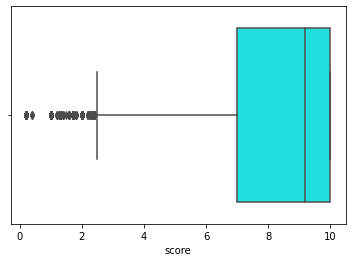

Boxplot of score
Q1 is :  7.0
Q2 is :  9.2
Q3 is :  10.0
IQR is: 3.0
Lower Whisker, Upper Whisker :  2.5 , 14.5
number of outliers are: 144415


In [105]:
#Check for outliers and impute them as required. 
# only score is the column which is numeric so we check it for outliers.
#Checking for outliers in the sample of 1000000
sns.boxplot(x= d_df['score'], color='cyan')
plt.show()
print('Boxplot of score')
#calculating the outiers in attribute 
Q1 = d_df['score'].quantile(0.25)
Q2 = d_df['score'].quantile(0.50)
Q3 = d_df['score'].quantile(0.75) 
IQR = Q3 - Q1
L_W = (Q1 - 1.5 *IQR)
U_W = (Q3 + 1.5 *IQR)    
print('Q1 is : ',Q1)
print('Q2 is : ',Q2)
print('Q3 is : ',Q3)
print('IQR is:',IQR)
print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
bools = (d_df['score'] < (Q1 - 1.5 *IQR)) |(d_df['score'] > (Q3 + 1.5 * IQR))
print('number of outliers are:',bools.sum())   #calculating the number of outliers

In [106]:
# function to treat outliers
#Removing outliers by removing data below lower whisker and above upper whisker
Q1 = d_df['score'].quantile(0.25)
Q3 = d_df['score'].quantile(0.75)
IQR = Q3 - Q1
d_df = d_df[(d_df['score'] > (Q1 - 1.5 *IQR)) & (d_df['score'] < (Q3 + 1.5 *IQR))]
bools = (d_df['score'] < (Q1 - 1.5 *IQR)) |(d_df['score'] > (Q3 + 1.5 * IQR))
print('number of outliers are:',bools.sum())   #calculating the number of outliers
d_df.shape

number of outliers are: 0


(1282731, 3)

In [107]:
#Try cross validation techniques to get better results.
cross_validate(algo,data_U, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([2.65921407, 2.67439374, 2.68855884]),
 'fit_time': (0.18326067924499512, 0.18926453590393066, 0.19327449798583984),
 'test_time': (0.016673564910888672,
  0.0010309219360351562,
  0.01562643051147461)}

In what business scenario you should use popularity based Recommendation Systems ?

Popularity Based Filtering As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

In what business scenario you should use CF based Recommendation Systems ?


Collaborative filtering technique works by building a database (user-item matrix) of preferences for items by users. It then matches users with relevant interest and preferences by calculating similarities between their profiles to make recommendations [43]. Such users build a group called neighborhood.Content-based filtering relies on the characteristics of the products themselves, so it doesn’t rely on other users to interact with the products before making a recommendation. Demographic based recommender system: This type of recommendation system categorizes users based on a set of demographic classes.

What other possible methods can you think of which can further improve the recommendation for different users ?

1. Popular products
2. Rating-based recommendations
3. Personalized recommendations
Recommendations on the product page
4. Similar products
5. “Customer who bought/viewed this…” collaborative filtering
6. Personalized recommendations
Cart recommendations
7. Recommending accessories
8. Frequently bought together
Category page recommendation
9. Popular products
10. Zero result and 404 pages

# conclusion

RMSE for SVD model is 2.853
RMSE for user-user collab model is 0.944
RMSE for item-item collab model is 0.92
RMSE for collabrative filtering of KNN is 2.8401
RMSE user based model is 2.7736